In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as mp
from matplotlib.patches import Patch
import seaborn as sns

In [3]:
movie_path = r"/Users/samer/Documents/github_repos/Cinemalytics/data/clean/updated_clean_combined_movies.csv"
movies_df = pd.read_csv(movie_path)

# Display Clean Movies dataset column names
print("\nClean Combined Movies dataset column names:")
print(movies_df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'age_rating', 'duration_min', 'genre', 'budget', 'revenue', 'platform']


## Number of Movies by Genre in all Platforms & by Individual Platforms ##

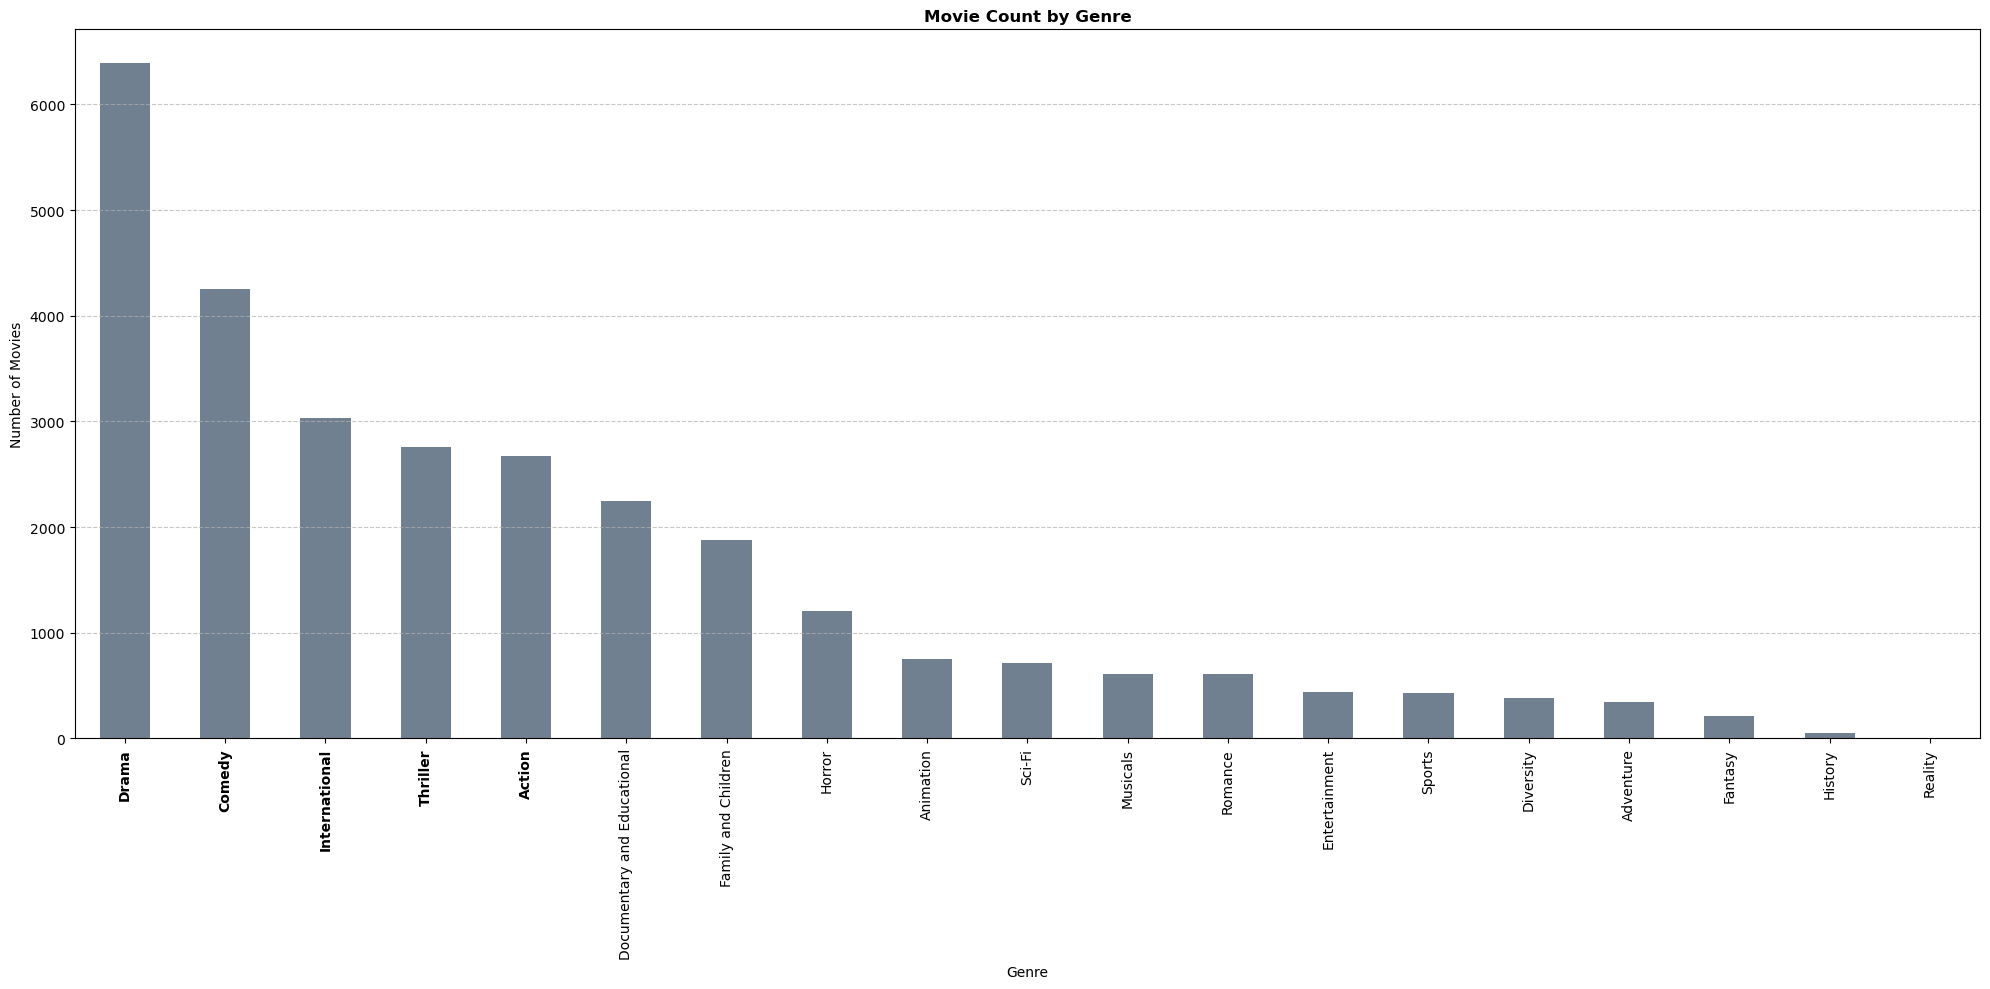

In [4]:
movies_df = movies_df.assign(genre=movies_df['genre'].str.split(', ')).explode('genre')
movies_genre_counts = movies_df['genre'].value_counts()

# Define colors for top 5 genres and other genres
top_5_colors = ['skyblue' for genre in movies_genre_counts.index]

# Plotting all genres
plt.figure(figsize=(20, 10))

bars = movies_genre_counts.plot(kind='bar', color='slategrey')

# Adding labels and titles
plt.title('Movie Count by Genre',fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Make the front of the top 5 x-axis labels bold
for label in plt.gca().get_xticklabels():
    if label.get_text() in movies_genre_counts.head(5).index:
        label.set_weight('bold')

plt.show()

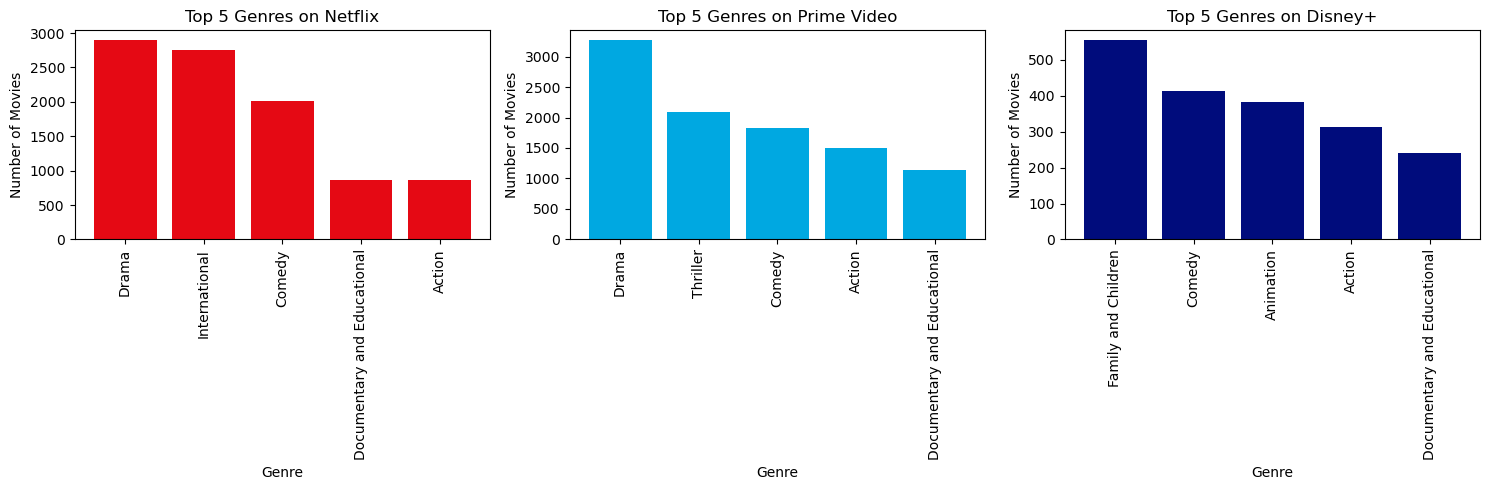

In [10]:
def plot_top5_genres(ax, df, platform_name, color):
    # Count the occurrences of each genre
    genre_counts = df['genre'].value_counts().nlargest(5)
    # Plot
    ax.bar(genre_counts.index, genre_counts.values, color=color)
    ax.set_title(f'Top 5 Genres on {platform_name}')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Number of Movies')
    ax.tick_params(axis='x', rotation=90)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Filter data for each platform
disney_df = movies_df[movies_df['platform'] == 'Disney+']
netflix_df = movies_df[movies_df['platform'] == 'Netflix']
prime_video_df = movies_df[movies_df['platform'] == 'Prime Video']  

# Plot for Netflix
plot_top5_genres(axes[0], netflix_df, 'Netflix', color='#E50914')

# Plot for Prime Video
plot_top5_genres(axes[1], prime_video_df, 'Prime Video', color='#00A8E1')

# Plot for Disney+
plot_top5_genres(axes[2], disney_df, 'Disney+', color='#000c7c')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Age Rating Distribution by Genre In Total & Individual by Platforms ##

In [5]:
# Define color dictionary with fixed colors for each age rating
mediumaquamarine = mcolors.CSS4_COLORS['mediumaquamarine']
palegoldenrod = mcolors.CSS4_COLORS['palegoldenrod']
pink = mcolors.CSS4_COLORS['pink']
lightskyblue = mcolors.CSS4_COLORS['lightskyblue']
peachpuff = mcolors.CSS4_COLORS['peachpuff']
orchid = mcolors.CSS4_COLORS['orchid']
tomato = mcolors.CSS4_COLORS['tomato']
linen = mcolors.CSS4_COLORS['linen']

# Define color dictionary with fixed colors for each age rating
age_rating_colors = {
    'G': mediumaquamarine,
    'PG': palegoldenrod,
    'PG-13': pink,
    '13+': lightskyblue,
    '16+': peachpuff,
    'R': orchid,
    '18+': tomato,
    'NR': linen
}

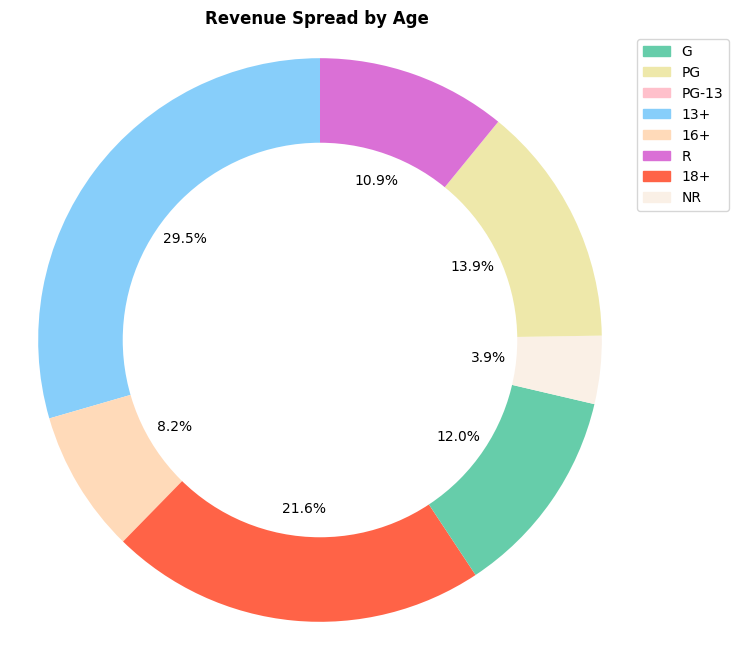

In [28]:
# Group by age_rating and calculate total revenue for each age rating
revenue_by_age_rating = movies_df.groupby('age_rating')['revenue'].sum()

# Create the legend for age_rating
patch_list = [Patch(color=color, label=age_rating) for age_rating, color in age_rating_colors.items()]

# Create a donut plot
plt.figure(figsize=(8, 8))

# Plot donut chart without age rating labels
plt.pie(revenue_by_age_rating, autopct='%1.1f%%', startangle=90,
        colors=[age_rating_colors.get(age_rating, 'lightgrey') for age_rating in revenue_by_age_rating.index])

# Draw a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Revenue Spread by Age ', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add legend for age_rating
plt.legend(handles=patch_list, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

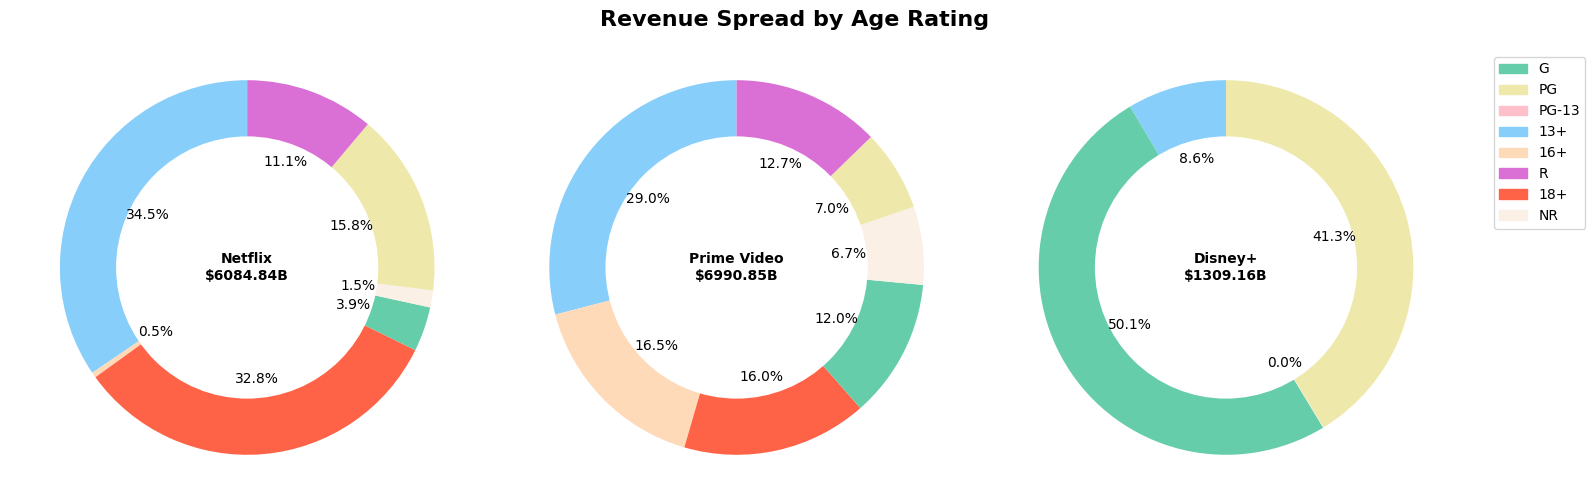

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Function to plot revenue - age rating distribution for a given platform
def plot_platform_distribution(platform):
    # Filter data for the given platform
    platform_df = movies_df[movies_df['platform'] == platform]
    
    # Group by age_rating and calculate total revenue for each age rating
    revenue_by_age_rating = platform_df.groupby('age_rating')['revenue'].sum()
    
    # Calculate total revenue for the platform in billions
    total_revenue_billion = platform_df['revenue'].sum() / 1e9
    
    # Plot donut chart
    plt.pie(revenue_by_age_rating, labels=None, autopct='%1.1f%%', startangle=90,
            colors=[age_rating_colors.get(age_rating, 'lightgrey') for age_rating in revenue_by_age_rating.index])
    
    # Draw a circle in the middle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)
    
    # Add total revenue inside the plot
    plt.text(0, 0, f'{platform}\n${total_revenue_billion:.2f}B', horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold', color='black')
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    
    # Remove tags within the plot
    plt.ylabel('')

# Plot all distributions together
plt.figure(figsize=(16, 5))

# Plot distribution for each platform in the specified order
platform_order = ['Netflix', 'Prime Video', 'Disney+']
for i, platform in enumerate(platform_order, start=1):
    plt.subplot(1, 3, i)
    plot_platform_distribution(platform)

# Add a single headline
plt.suptitle("Revenue Spread by Age Rating", fontsize=16, fontweight='bold')

# Create legend for age_rating
patch_list = [Patch(color=color, label=age_rating) for age_rating, color in age_rating_colors.items()]

# Add a single legend for age_rating
plt.legend(handles=patch_list, loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## Age Rating Distribution by Movie Count ##

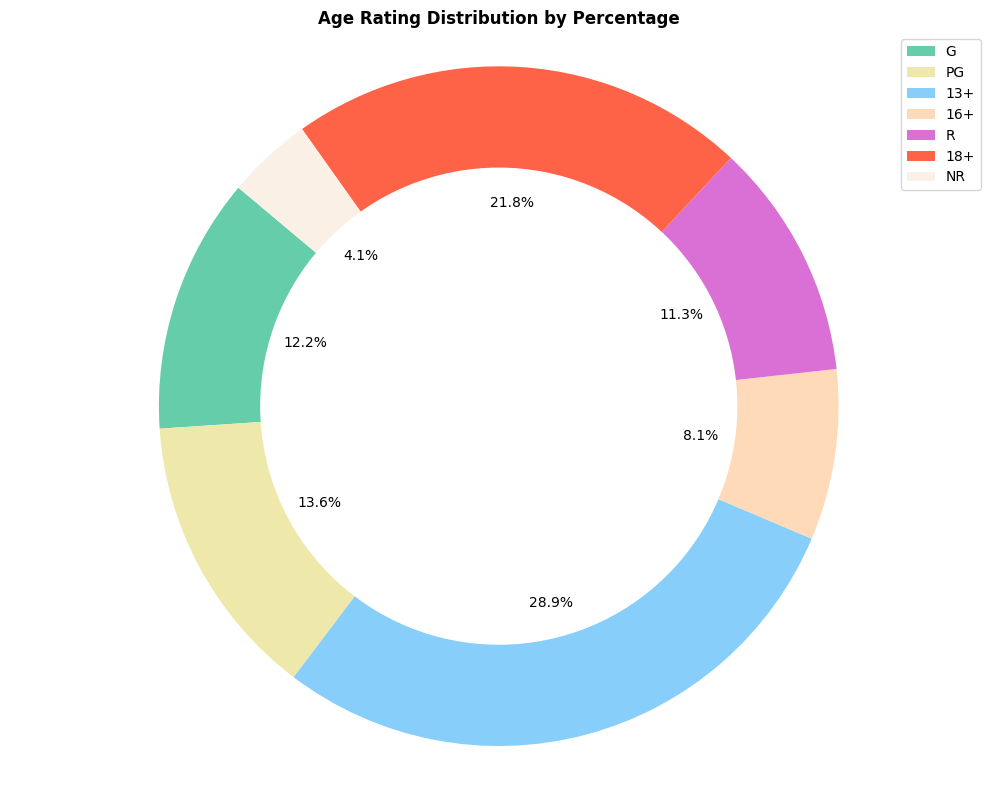

In [9]:
# Count the number of movies for each age rating
movie_counts = movies_df['age_rating'].value_counts()

# Reorder the age ratings
movie_counts = movie_counts.reindex(age_rating_colors.keys())

# Remove NaN values
movie_counts = movie_counts.dropna()

# Plotting
plt.figure(figsize=(20, 8))


# Pie chart
plt.subplot(1, 2, 2)
plt.pie(movie_counts, colors=[age_rating_colors[age_rating] for age_rating in movie_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Age Rating Distribution by Percentage',fontweight='bold')
plt.legend(movie_counts.index, loc="best")
plt.axis('equal')
# Add a circle at the center to transform the pie chart into a donut chart
circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)

plt.tight_layout()
plt.show()